# Introduction
In the final part, we perform machine learning to predict whether a mushroom is poisonous or otherwise. 

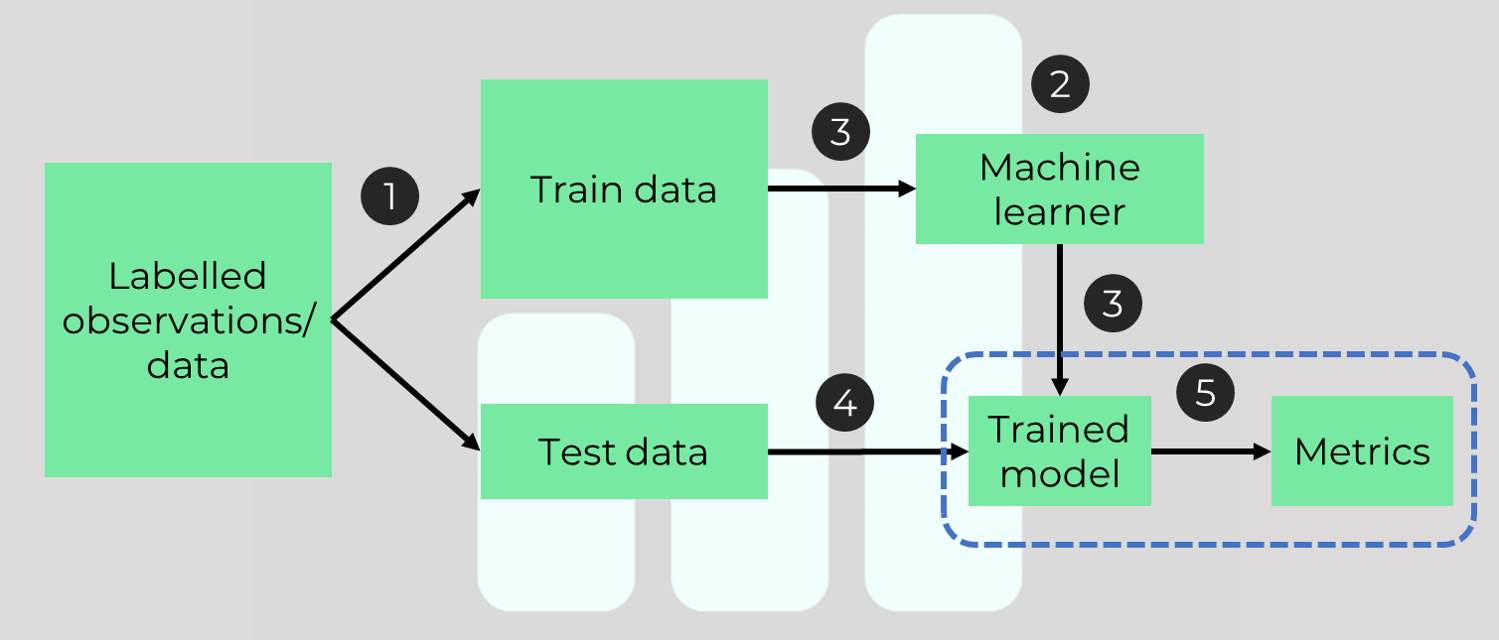

We put this section on all of the projects in UpLevel so bear with us if you've seen this before. 

Generally, the machine learning process has five parts:
1. <strong>Split your data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import your models from sklearn and instantiate them (assign model object to a variable)
3. <strong>model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data

Highly recommended readings:
1. [Important] https://scipy-lectures.org/packages/scikit-learn/index.html
2. https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
3. https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### Step 1: Import your librarys
We will be using models from sklearn - a popular machine learning library. However, we won't import everything from sklearn and take just what we need. 

We'll need to import plotting libraries to plot our predictions against the ground truth (test data). 

Import the following first:
1. pandas

In [1]:
# Step 1: Import the library
import pandas as pd

### Step 2: Read the CSV from Part III
We will now read the CSV that we exported from Part III containing the dummified values.

In [2]:
# Step 2: Read the CSV from Part III
df = pd.read_csv('agaricus-lepiota.data')
df.pop('Unnamed: 0')
df

,class,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


### Step 3: Import the machine learning libraries
Let's import the following machine learning libraries as well:
1. train_test_split from sklearn.model_selection
2. LogisticRegression from sklearn.linear_model
3. DecisionTreeClassifier from sklearn.tree
4. f1_score from sklearn.metrics
5. confusion_matrix from sklearn.metrics

In [43]:
# Step 3: Import the next set of libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import tree
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

### Step 4: Prepare your independent and dependent variables
Now that we have everything done, let's prepare our independent variables (the dummified physical characteristics) and the dependent variable (edible/poison binary). 

1. Declare a variable, and assign your independent variables to it, i.e. drop "class" from the DataFrame from Step 3
2. Declare a variable, and assign only values from "class"

In [5]:
# Step 4: Prepare your independent and dependent variables
X = df.drop(columns = ['class'])
y = df['class']


### Step 5: Split your indepedent and dependent variables into train and test sets
We'll be using a 80/20 split for train and test set respectively, using the train_test_split function, stratified by y. 

In [7]:
# Step 5: Split your data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, stratify = y)

### Step 6: Train your machine learning model
Once you've split your data, machine learning begins. 

This is what you'll need to do:
1. Start with a model
2. Declare a variable, and store your model in it (don't forget to use brackets)
3. Fit your training data into the instantiated model
4. Declare a variable that contains predictions from the model you just trained, using the train dataset (X_test)

Also, the recommended readings will be very helpful.

We will start with LogisticRegression.

In [44]:
# Step 6a: Declare a variable to store the LogisticRegression model
model = LogisticRegression()

# Step 6b: Fit your train dataset
model.fit(X_train, y_train)

# Step 6c: Declare a variable and store your predictions that you make with your model using X test data
y_pred = model.predict(X_test)

# Step 6d: Print the f1_score between the y test and prediction
print (metrics.f1_score(y_test, y_pred))

# Step 6e: Print the confusion matrix using the y test and prediction
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

1.0
[[842   0]
 [  0 783]]


### Step 7: Train a DecisionTree model
Wait what? If you did things correctly, you shoud get a perfect result.

While this is great, it's still important to try other models and see if they perform similarly. 

Let's go with DecisionTree next. 

In [47]:
# Step 7a: Declare a variable to store the DecisionTreeClassifier model
tree = tree.DecisionTreeClassifier()

# Step 7b: Fit your train dataset
tree.fit(X_train, y_train)

# Step 7c: Declare a variable and store your predictions that you make with your model using X test data
y_pred = tree.predict(X_test)

# Step 7d: Print the f1_score between the y test and prediction
print (metrics.f1_score(y_test, y_pred))

# Step 7e: Print the confusion matrix using the y test and prediction
cfn_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cfn_matrix)

1.0
[[842   0]
 [  0 783]]


### Step 8: Get feature_importances of your DecisionTree model
Wow ok, another perfect model. Let's take a look under the hood and see what's driving the 'decisions' in the DecisionTreeClassifier. 

Create a DataFrame using the train data's columns, and the .feature_importances_ attribute in the model. This will show you a table containing the feature names and their importance in the model. 

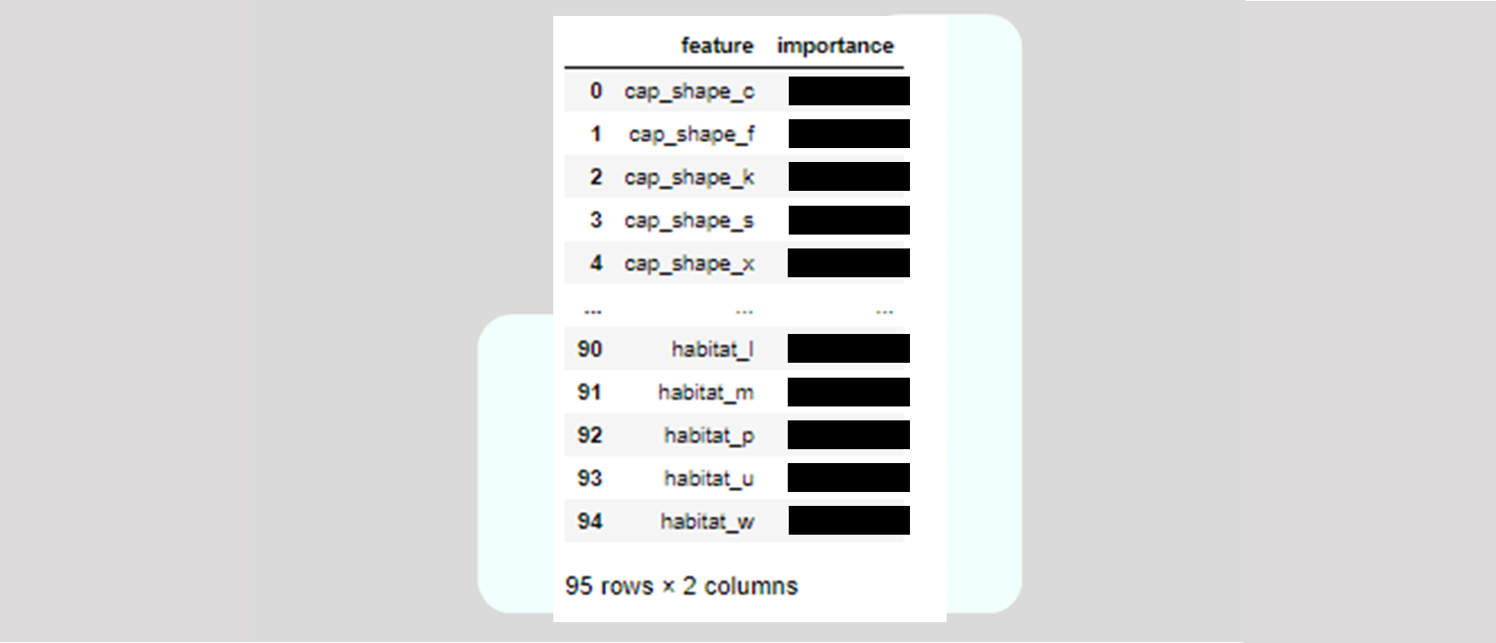

In [48]:
# Step 8: Get feature importances of the DecisionTree model
importance = tree.feature_importances_
pd.DataFrame({'feature': X.columns,
             'importance': tree.feature_importances_})



,feature,importance
0,cap_shape_c,0.000615
1,cap_shape_f,0.000000
2,cap_shape_k,0.000000
3,cap_shape_s,0.000000
4,cap_shape_x,0.000000
...,...,...
90,habitat_l,0.000000
91,habitat_m,0.000000
92,habitat_p,0.000000
93,habitat_u,0.000000


### Step 9: Sort your feature importance DataFrame
If you haven't done so, you can sort your DataFrame in a descending order and take the first 20 rows so that you can identify the top features used.

<strong>Hint: Google "sort dataframe by column"</strong>

In [49]:
# Step 9: Sort your DataFrame by feature importances
pd.DataFrame({'feature': X.columns,
             'importance': tree.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
22,odor_n,0.612488
42,stalk_root_c,0.186681
44,stalk_root_r,0.084077
80,spore_print_color_r,0.033976
20,odor_l,0.021411
...,...,...
32,gill_color_k,0.000000
31,gill_color_h,0.000000
30,gill_color_g,0.000000
29,gill_color_e,0.000000


Looks like there's a feature that is the most useful in building the tree, seems like odor is the most crucial feature in determining whether or not a mushroom is edible or not.

## Interpreting the significance of your model
While we have achieved the best case scenario, i.e. training the perfect model, it's important to understand the significance of your work.

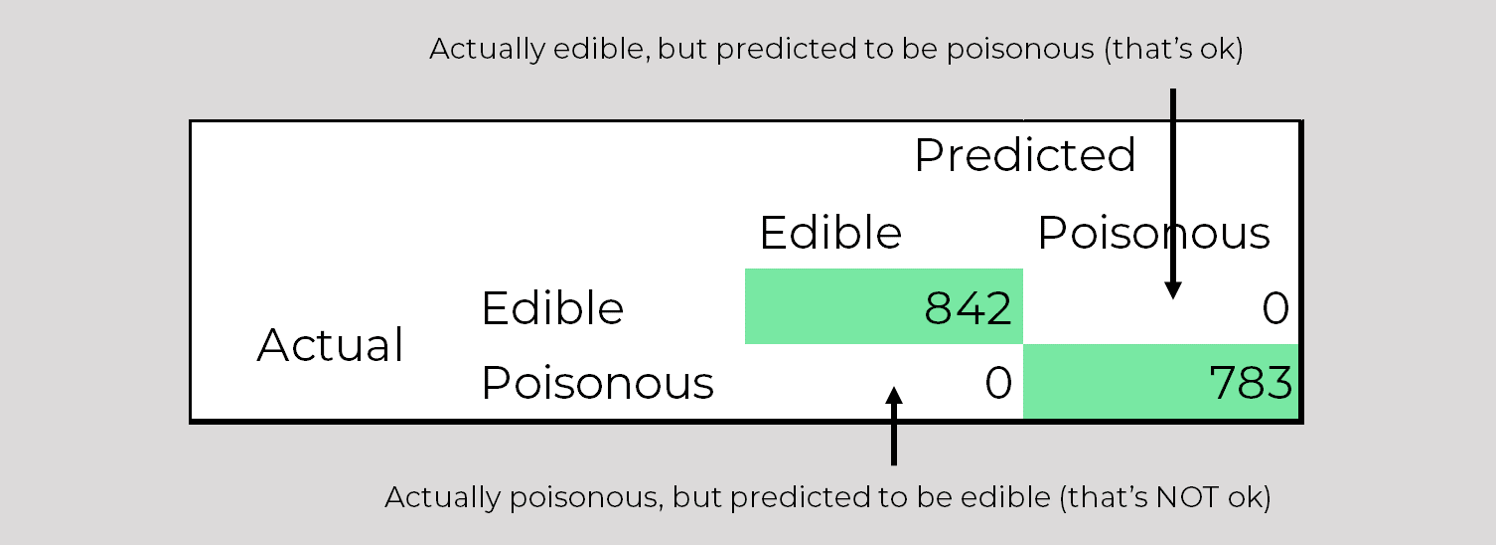

In the business context, it's important to consider the implication of one's work. 

In our case, one error is more significant than another. If you classified a mushroom as poisonous when it is not, it's fine. However, if you classified a poisonous mushroom as edible, it'd spell big trouble for you.

## [Optional] Tree visualization
Make sure you updated your scikit-learn to the latest version so that you can enjoy the latest method - plot_tree (documentation <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html'>here</a>).

However, if you have not, fret not there are other ways to do it.

<strong>Hint: Google "plot decision tree python graphviz"</strong>

### Step 10: Visualize the tree using export_graphviz
If your scikit-learn is not the latest version, or you have trouble importing sklearn.tree, no worries.

Here are the steps:
1. from sklearn.tree import export_graphviz
2. print the results of export_graphviz function of your tree
3. copy and paste the printed results onto an online Graphviz viewer

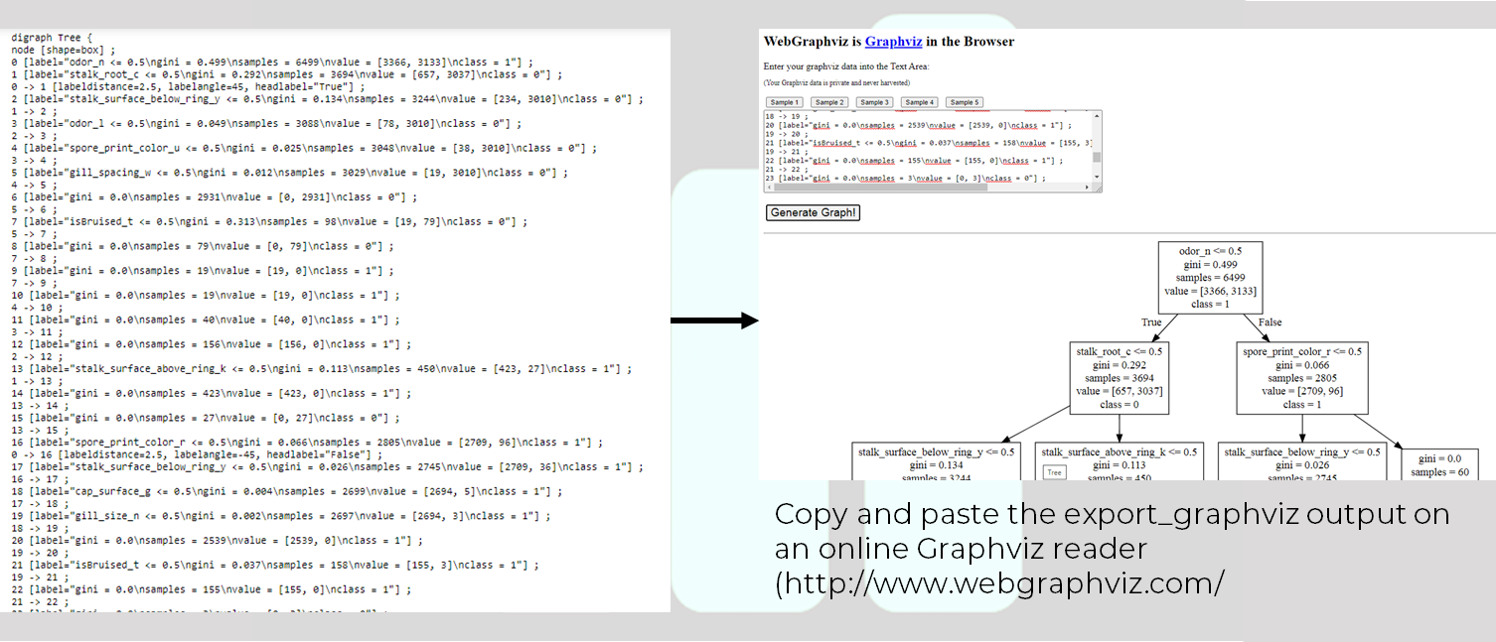

In [51]:
# Step 10a: Import export_graphviz from sklearn.tree 
from sklearn.tree import export_graphviz

In [ ]:
# Step 10b: Print the export_graphviz output for your tree

# Step 10c: Copy the print output and find an online Graphviz viewer and paste the output there

### Step 11: Vizualize the tree using plot_tree function
This is only applicable to you if you've updated your version of Python and scikit-learn to the latest version (don't be stressed if you don't - you can leave this completely empty).

Here are the steps:
1. import plot_tree from sklearn.tree
2. import matplotlib.pyplot as plt
3. plot your tree using plot_tree function

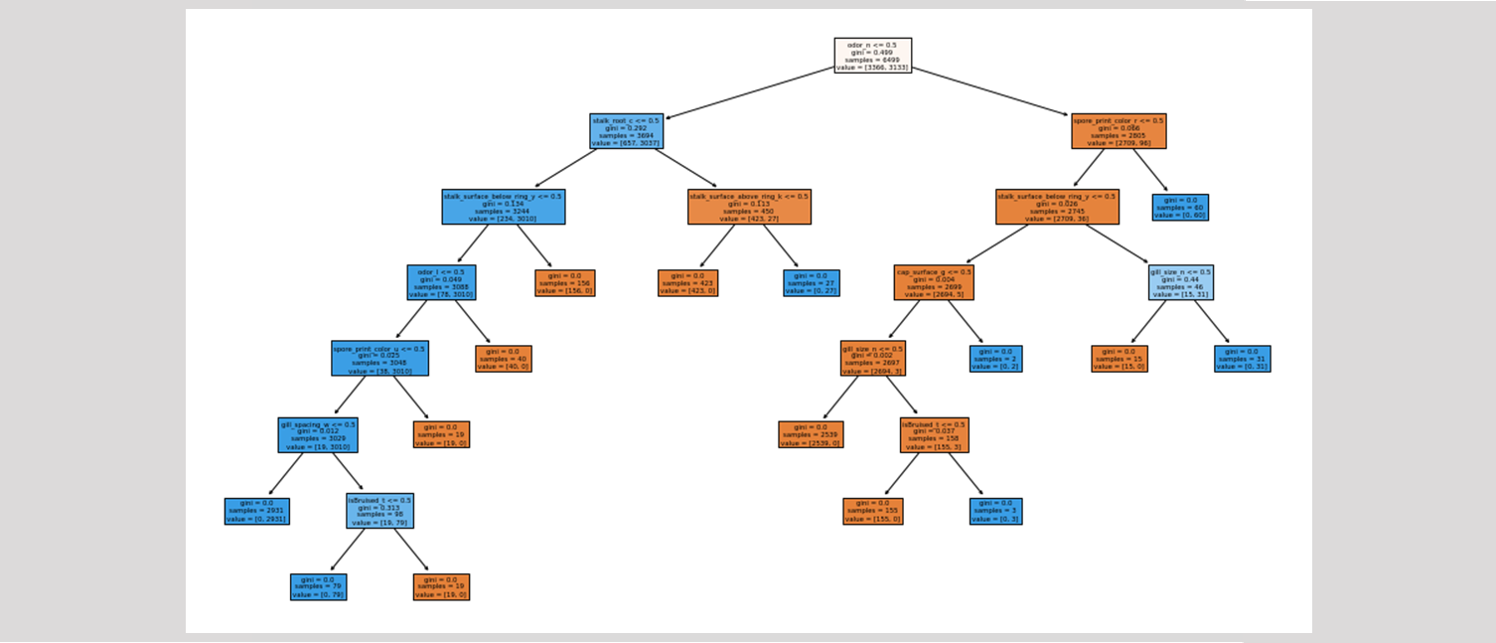

You will see something like this!

In [53]:
# Step 11a: Import your libraries
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt

In [54]:
# Step 11b: Use the plot_tree function to plot your tree
tree.plot_tree(tree)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'plot_tree'

# The end
And that's the end! To recap, you've:
1. Collected mushroom data and prepared it for analysis
2. Performed exploratory data analysis
3. Engineered new features
5. Trained a machine learning model to predict mushroom edibility
6. Visualized a DecisionTreeClassifier model

Go on, give yourself a pat on the back. We hope this project series has give you more confidence in coding and machine learning. 

You trained an absolutely perfect model, and no one will get poisoned when they go out into the wild with your model.

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come. Come join us in our Telegram community over at https://bit.ly/UpLevelSG and our Facebook page at https://fb.com/UpLevelSG